# Spotify Music Trends Analysis (2009–2025)

Goal: Analyze how music characteristics and popularity have evolved on Spotify over time using descriptive analytics.

Tools: Python (pandas, matplotlib)
<!-- Data: Downloaded from :https://www.kaggle.com/datasets/wardabilal/spotify-global-music-dataset-20092025 -->


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("default")


PHASE 1 — Data Loading

In [3]:
modern = pd.read_csv("spotify_data clean.csv")
classic = pd.read_csv("track_data_final.csv")


In [15]:
modern.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,3EJS5LyekDim1Tf5rBFmZl,Trippy Mane (ft. Project Pat),4,0,True,Diplo,77,2812821,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.55
1,1oQW6G2ZiwMuHqlPpP27DB,OMG!,1,0,True,Yelawolf,64,2363438,"country hip hop, southern hip hop",4SUmmwnv0xTjRcLdjczGg2,OMG!,2025-10-31,1,single,3.07
2,7mdkjzoIYlf1rx9EtBpGmU,Hard 2 Find,1,4,True,Riff Raff,48,193302,NaN,3E3zEAL8gUYWaLYB9L7gbp,Hard 2 Find,2025-10-31,1,single,2.55
3,67rW0Zl7oB3qEpD5YWWE5w,Still Get Like That (ft. Project Pat & Starrah),8,30,True,Diplo,77,2813710,moombahton,5QRFnGnBeMGePBKF2xTz5z,"d00mscrvll, Vol. 1",2025-10-31,9,album,1.69
4,15xptTfRBrjsppW0INUZjf,ride me like a harley,2,0,True,Rumelis,48,8682,dark r&b,06FDIpSHYmZAZoyuYtc7kd,come closer / ride me like a harley,2025-10-30,2,single,2.39


In [16]:
classic.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,False,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58,compilation,3.552883
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,False,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1,single,2.646000
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,False,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26,album,3.755467
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,True,Billie Eilish,90.0,118692183.0,[],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,2021-07-30,16,album,2.641050
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,False,Rihanna,90.0,68997177.0,[],5QG3tjE5L9F6O2vCAPph38,Loud,2010-01-01,13,album,4.450217


PHASE 2 — Data Cleaning

In [24]:
#  Round to 2 decimels the column track_duration_min
classic["track_duration_min"]=classic["track_duration_min"].round(2)
classic["track_duration_min"].describe()

count    8778.000000
mean        3.502649
std         1.055456
min         0.000000
25%         2.900000
50%         3.450000
75%         3.997500
max        13.520000
Name: track_duration_min, dtype: float64

In [25]:
classic.head()

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,False,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58,compilation,3.55
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,False,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1,single,2.65
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,False,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26,album,3.76
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,True,Billie Eilish,90.0,118692183.0,[],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,2021-07-30,16,album,2.64
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,False,Rihanna,90.0,68997177.0,[],5QG3tjE5L9F6O2vCAPph38,Loud,2010-01-01,13,album,4.45


In [26]:
# Parse release dates
modern["album_release_date"] = pd.to_datetime(
    modern["album_release_date"], errors="coerce"
)
classic["album_release_date"] = pd.to_datetime(
    classic["album_release_date"], errors="coerce"
)


In [28]:
# Extract release year
modern["release_year"] = modern["album_release_date"].dt.year
classic["release_year"] = classic["album_release_date"].dt.year
modern["release_year"].value_counts().head()


2025    765
2024    648
2023    523
2018    522
2019    496
Name: release_year, dtype: int64

In [29]:
# Add era labels
modern["era"] = "Modern (2025)"
classic["era"] = "Classic (2009–2023)"


In [30]:
# Align columns & merge
common_cols = [
    'track_id', 'track_name', 'track_number', 'track_popularity',
    'explicit', 'artist_name', 'artist_popularity', 'artist_followers',
    'artist_genres', 'album_id', 'album_name', 'album_release_date',
    'album_total_tracks', 'album_type', 'track_duration_min',
    'release_year', 'era'
]

modern = modern[common_cols]
classic = classic[common_cols]

spotify = pd.concat([classic, modern], ignore_index=True)


In [32]:
spotify.shape

(17360, 17)

In [33]:
spotify.head(5)

,track_id,track_name,track_number,track_popularity,explicit,artist_name,artist_popularity,artist_followers,artist_genres,album_id,album_name,album_release_date,album_total_tracks,album_type,track_duration_min,release_year,era
0,6pymOcrCnMuCWdgGVTvUgP,3,57,61,False,Britney Spears,80.0,17755451.0,['pop'],325wcm5wMnlfjmKZ8PXIIn,The Singles Collection,2009-11-09,58,compilation,3.55,2009.0,Classic (2009–2023)
1,2lWc1iJlz2NVcStV5fbtPG,Clouds,1,67,False,BUNT.,69.0,293734.0,['stutter house'],2ArRQNLxf9t0O0gvmG5Vsj,Clouds,2023-01-13,1,single,2.65,2023.0,Classic (2009–2023)
2,1msEuwSBneBKpVCZQcFTsU,Forever & Always (Taylor’s Version),11,63,False,Taylor Swift,100.0,145396321.0,[],4hDok0OAJd57SGIT8xuWJH,Fearless (Taylor's Version),2021-04-09,26,album,3.76,2021.0,Classic (2009–2023)
3,7bcy34fBT2ap1L4bfPsl9q,I Didn't Change My Number,2,72,True,Billie Eilish,90.0,118692183.0,[],0JGOiO34nwfUdDrD612dOp,Happier Than Ever,2021-07-30,16,album,2.64,2021.0,Classic (2009–2023)
4,0GLfodYacy3BJE7AI3A8en,Man Down,7,57,False,Rihanna,90.0,68997177.0,[],5QG3tjE5L9F6O2vCAPph38,Loud,2010-01-01,13,album,4.45,2010.0,Classic (2009–2023)


## Data Preparation Summary

- Standardized track duration to minutes
- Parsed release dates and extracted release year
- Created an era variable to compare classic vs modern tracks
- Merged historical and modern Spotify datasets into a unified table


# PHASE 3 — EXPLORATORY DATA ANALYSIS (EDA)

In [41]:
# Basic descriptive statistics
spotify.describe(datetime_is_numeric=True,include="all").T
# What to look for:
# Range of track_popularity (0–100 scale)
# Typical track_duration_min
# Any strange min/max values

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
track_id,17360,8778,6pymOcrCnMuCWdgGVTvUgP,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_name,17358,7581,Flowers,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_number,17360.0,NaN,NaN,NaN,5.760887,1.0,1.0,4.0,9.0,102.0,6.035031
track_popularity,17360.0,NaN,NaN,NaN,52.293836,0.0,39.0,58.0,71.0,100.0,23.946852
explicit,17360,2,False,13020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_name,17353,2549,Taylor Swift,654,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_popularity,17356.0,NaN,NaN,NaN,69.843743,0.0,60.0,74.0,84.0,100.0,19.588595
artist_followers,17356.0,NaN,NaN,NaN,24196563.369613,0.0,489959.5,6141719.0,28327351.0,145542136.0,38084607.237948
artist_genres,13995,1313,[],4492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
album_id,17360,5317,3FFGbUutKWN1c4f0CJR4Uh,140,NaN,NaN,NaN,NaN,NaN,NaN,NaN


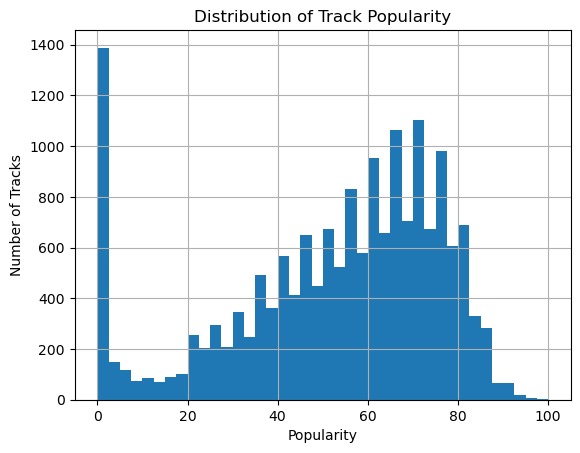

In [42]:
# Popularity distribution
# What to observe:
# Are most tracks low popularity?
# Is there a long tail of hits?"

spotify["track_popularity"].hist(bins=40)
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Number of Tracks")
plt.show()

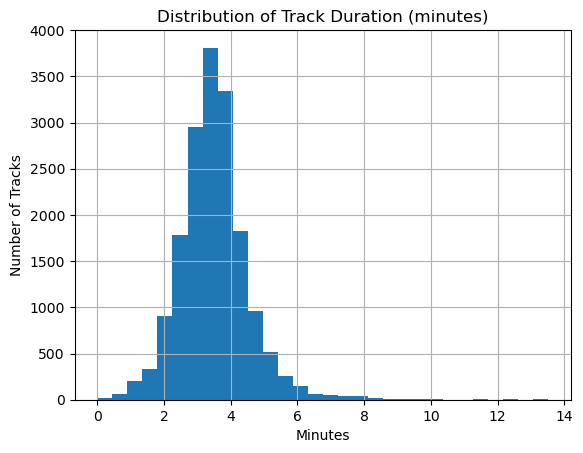

In [43]:
# Duration distribution
# What to observe:
# Typical song length (~2–4 minutes)
# Any extreme outliers (long tracks)

spotify["track_duration_min"].hist(bins=30)
plt.title("Distribution of Track Duration (minutes)")
plt.xlabel("Minutes")
plt.ylabel("Number of Tracks")
plt.show()


In [44]:
# Explicit content share
spotify["explicit"].value_counts(normalize=True) * 100


False    75.0
True     25.0
Name: explicit, dtype: float64

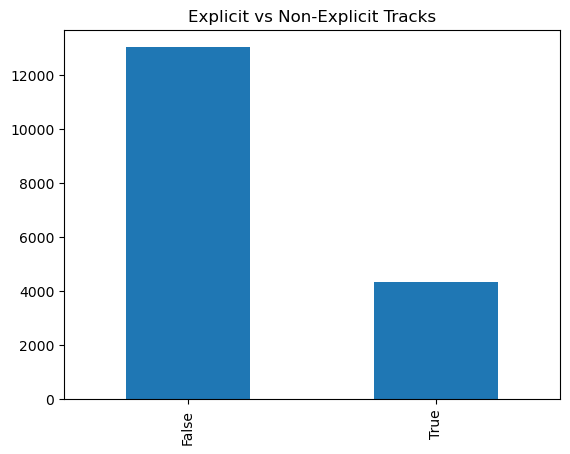

In [45]:
spotify["explicit"].value_counts().plot(kind="bar")
plt.title("Explicit vs Non-Explicit Tracks")
plt.show()


## Exploratory Overview

Initial exploration shows that Spotify track popularity is heavily skewed, with most tracks having low popularity 
and a small number of highly popular tracks. Track duration is concentrated between 2–4 minutes, reflecting standard 
industry norms. Explicit content represents a significant share of tracks, suggesting evolving content norms over time.


# Classic vs Modern Comparison
Now we start answering “how music changed”.

In [48]:
# Compare popularity by era

# Is modern music more or less popular on average?
# Is popularity more concentrated?

spotify.groupby("era")["track_popularity"].describe()

,count,mean,std,min,25%,50%,75%,max
era,,,,,,,,
Classic (2009–2023),8778.0,52.232855,24.075221,0.0,39.0,58.0,71.0,100.0
Modern (2025),8582.0,52.356211,23.816076,0.0,39.0,58.0,71.0,99.0


In [50]:
# Compare duration by era
spotify.groupby("era")["track_duration_min"].mean()

era
Classic (2009–2023)    3.502649
Modern (2025)          3.492805
Name: track_duration_min, dtype: float64

In [52]:
# Explicit content by era
spotify.groupby("era")["explicit"].mean() * 100

era
Classic (2009–2023)    24.971520
Modern (2025)          25.029131
Name: explicit, dtype: float64

TIME-BASED TREND ANALYSIS


In [55]:
tracks_per_year = (
    spotify.groupby("release_year")
    .size()
    .reset_index(name="track_count")
)

tracks_per_year.head()

,release_year,track_count
0,1952.0,2
1,1958.0,2
2,1959.0,10
3,1960.0,2
4,1962.0,10


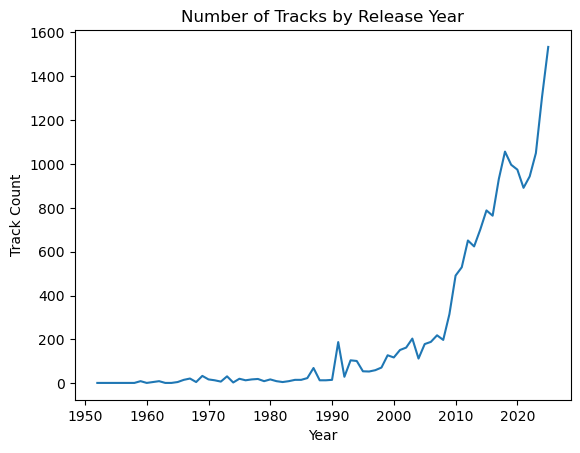

In [56]:
plt.plot(tracks_per_year["release_year"], tracks_per_year["track_count"])
plt.title("Number of Tracks by Release Year")
plt.xlabel("Year")
plt.ylabel("Track Count")
plt.show()

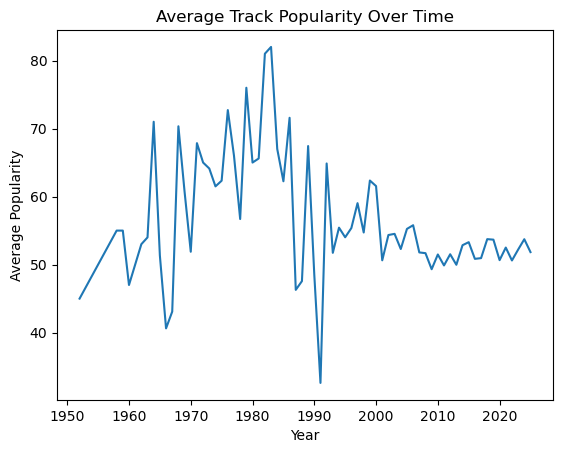

In [60]:
# Popularity trend over time
popularity_trend = (
    spotify.groupby("release_year")["track_popularity"]
    .mean()
    .reset_index()
)

plt.plot(popularity_trend["release_year"], popularity_trend["track_popularity"])
plt.title("Average Track Popularity Over Time")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.show()

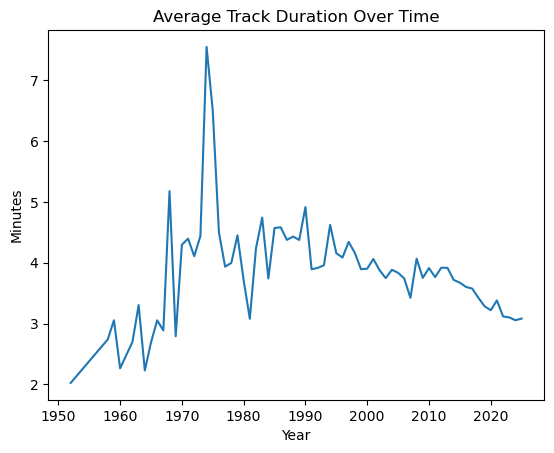

In [61]:
# Duration trend over time
duration_trend = (
    spotify.groupby("release_year")["track_duration_min"]
    .mean()
    .reset_index()
)

plt.plot(duration_trend["release_year"], duration_trend["track_duration_min"])
plt.title("Average Track Duration Over Time")
plt.xlabel("Year")
plt.ylabel("Minutes")
plt.show()

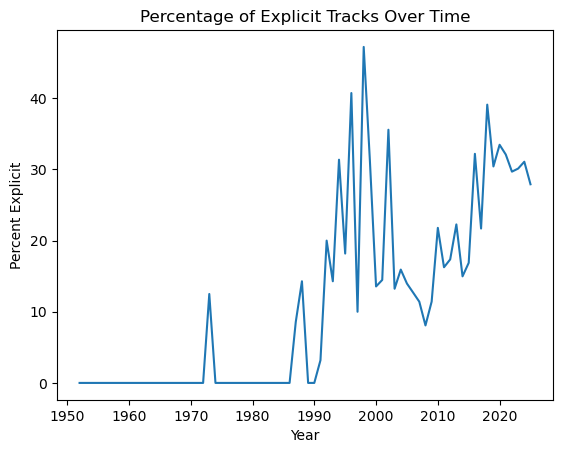

In [62]:
# Explicit content trend
explicit_trend = (
    spotify.groupby("release_year")["explicit"]
    .mean()
    .reset_index()
)

plt.plot(explicit_trend["release_year"], explicit_trend["explicit"] * 100)
plt.title("Percentage of Explicit Tracks Over Time")
plt.xlabel("Year")
plt.ylabel("Percent Explicit")
plt.show()

ARTIST & GENRE INSIGHTS

Who dominates Spotify in terms of output and popularity?

Are popular artists also the most followed?

What genres are most common?

Do different genres show different popularity patterns?

In [64]:
# Top artists by number of tracks

top_artists_by_tracks = (
    spotify.groupby("artist_name")
    .size()
    .sort_values(ascending=False)
    .head(10)
)

top_artists_by_tracks

artist_name
Taylor Swift         654
The Weeknd           292
Lana Del Rey         198
Ariana Grande        195
Nirvana              182
Drake                170
Post Malone          166
The Neighbourhood    154
Lady Gaga            142
Olivia Rodrigo       138
dtype: int64

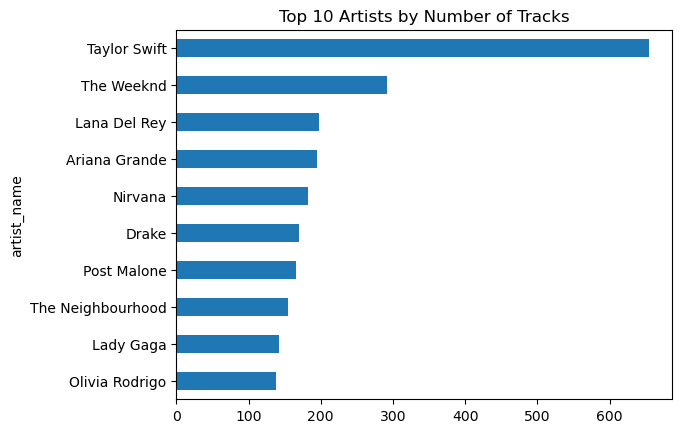

In [65]:
top_artists_by_tracks.plot(kind="barh", title="Top 10 Artists by Number of Tracks")
plt.gca().invert_yaxis()
plt.show()


In [66]:
# Top artists by average track popularity
top_artists_by_popularity = (
    spotify.groupby("artist_name")["track_popularity"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

top_artists_by_popularity

artist_name
HUNTR/X        93.750000
Saja Boys      93.500000
Disco Lines    92.000000
Rumi           91.000000
Olivia Dean    90.333333
The Police     90.000000
Djo            89.000000
W Sound        89.000000
KATSEYE        88.666667
Jin            88.000000
Name: track_popularity, dtype: float64

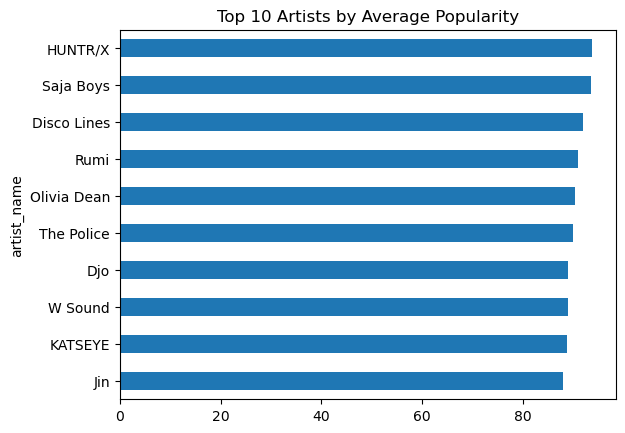

In [67]:
top_artists_by_popularity.plot(kind="barh", title="Top 10 Artists by Average Popularity")
plt.gca().invert_yaxis()
plt.show()

In [68]:
# Artist popularity vs followers (relationship)
spotify[["artist_popularity", "artist_followers"]].corr()


,artist_popularity,artist_followers
artist_popularity,1.000000,0.636635
artist_followers,0.636635,1.000000


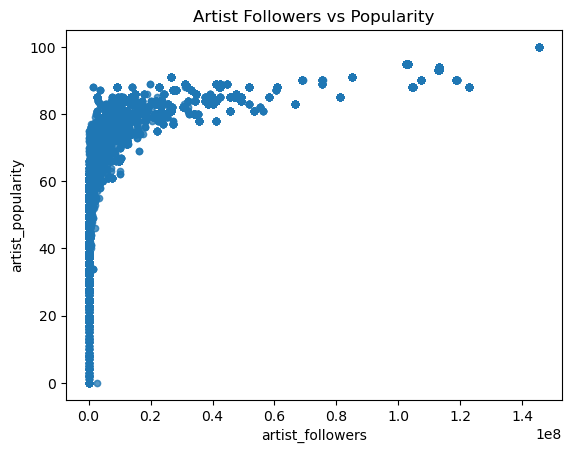

In [69]:
spotify.plot(
    kind="scatter",
    x="artist_followers",
    y="artist_popularity",
    alpha=0.5,
    title="Artist Followers vs Popularity"
)
plt.show()

In [70]:
# Genre analysis
genres = (
    spotify["artist_genres"]
    .dropna()
    .str.split(", ")
    .explode()
)


In [71]:
genres.value_counts().head(10)


[]                4492
pop                920
country            680
soundtrack         450
hip hop            431
indie              376
['soundtrack']     346
folk               337
rock               327
['pop']            303
Name: artist_genres, dtype: int64

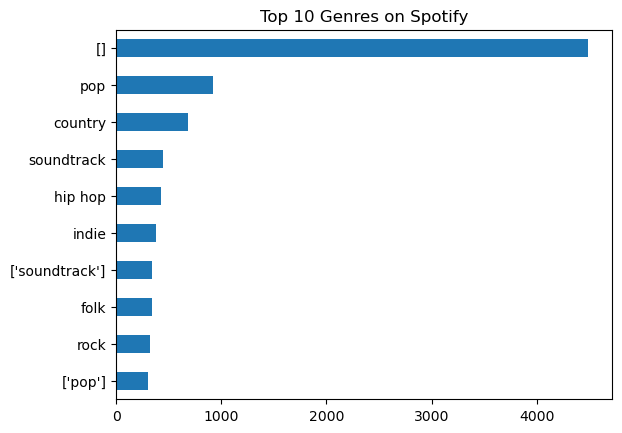

In [72]:
# Top genres by frequency

top_genres = genres.value_counts().head(10)

top_genres.plot(kind="barh", title="Top 10 Genres on Spotify")
plt.gca().invert_yaxis()
plt.show()

In [73]:
genre_popularity = (
    spotify.dropna(subset=["artist_genres"])
    .assign(genre=spotify["artist_genres"].str.split(", "))
    .explode("genre")
    .groupby("genre")["track_popularity"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

genre_popularity

genre
['pop soul']             90.333333
'sad sierreño']          87.000000
'indie soul']            86.500000
trap funk                85.000000
'trap funk'              85.000000
'funk consciente']       85.000000
['brazilian funk'        85.000000
funk consciente          85.000000
['glam rock'             84.000000
['reggaeton chileno']    84.000000
Name: track_popularity, dtype: float64

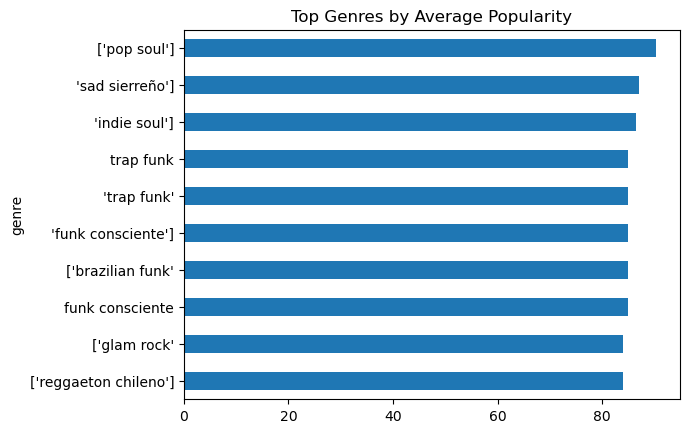

In [74]:
# Popularity by genre
genre_popularity.plot(kind="barh", title="Top Genres by Average Popularity")
plt.gca().invert_yaxis()
plt.show()


## Artist & Genre Insights

Artist-level analysis shows a clear distinction between prolific artists and highly popular ones, indicating that catalog size does not necessarily translate to higher popularity. Genre analysis reveals a concentration of tracks within a small number of dominant genres, while average popularity varies significantly across genres.
